In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import multiprocessing as multi
import time

In [11]:
%%capture PC_name 
!hostname

**Setting notebook parameters**

In [12]:
#setting dots per inch for images
dpi = 120

#setting number of processors for multiprocessing
PC_name_str = PC_name.stdout[0:-2]

if (PC_name_str == 'arc10'or PC_name_str == 'science11' or 
        PC_name_str == 'science10'):
    cores = 42        
#     cores = multi.cpu_count()
    
else:
    cores = multi.cpu_count()

print(PC_name_str)
print(cores)

arc10
42


In [13]:
df_sdss_gals = pd.read_csv('../codes_for_SDSS/Data/SAS_FITS/galaxy_DR12v5_CMASSLOWZTOT_all_sky_Comov.csv',
                         index_col = 0)
df_sdss_gals.describe().apply(lambda s: s.apply('{0:.3f}'.format))

/vol/arc10/data1/amirza/Misc/anaconda/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,RA,DEC,Z,r_comov[Mpc/h],X_comov[Mpc/h],Y_comov[Mpc/h],Z_comov[Mpc/h]
count,1325735.000,1325735.000,1325735.000,1325735.000,1325735.000,1325735.000,1325735.000
mean,178.676,23.417,0.452,2596.975,-594.580,-74.705,976.706
std,92.194,18.180,0.157,823.919,1964.434,1263.945,808.397
min,0.000,-10.997,0.000,0.032,-4993.670,-4315.740,-805.466
25%,135.845,8.361,0.347,2083.786,-2049.560,-983.879,307.587
50%,181.891,21.477,0.486,2808.285,-1230.263,-33.060,847.189
75%,227.366,35.940,0.563,3185.174,1177.849,835.904,1535.834
max,359.999,68.738,1.137,5500.920,4902.803,4241.546,4441.835


In [14]:
df_act_clus = pd.read_csv('Data/ACT_DR5_Clusters_Comov.csv', index_col = 0)
df_act_clus.describe()

,RADeg,decDeg,redshift,M500,r_comov[Mpc/h],x_comov[Mpc/h],y_comov[Mpc/h],z_comov[Mpc/h]
count,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000
mean,151.193567,-11.682177,0.550965,2.621147,3030.791002,471.456800,324.588298,-565.562838
std,117.664528,24.306970,0.260175,1.092935,1210.984726,2364.292580,1635.569100,1319.756732
min,0.020896,-59.987040,0.035200,1.042072,228.608662,-6163.229233,-5208.507048,-5650.519796
25%,39.386235,-34.828811,0.354170,1.961358,2120.021116,-1613.598656,-775.581220,-1455.432920
50%,144.342767,-2.252158,0.519816,2.361268,2974.576250,1069.530532,384.114036,-99.930771
75%,232.604297,8.957936,0.709455,2.937229,3853.453854,2242.835822,1467.460902,367.275769
max,359.988280,20.486048,1.910000,13.442958,7645.791379,6535.053581,5109.411777,2019.742158


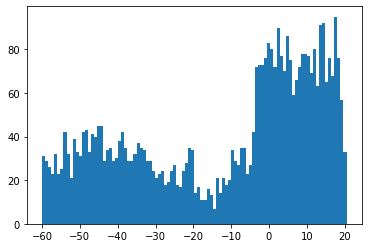

1888


In [15]:
%matplotlib inline
plt.hist(df_act_clus['decDeg'], bins = 100);
plt.show()
print(len(df_act_clus[df_act_clus['decDeg'] > 0]))

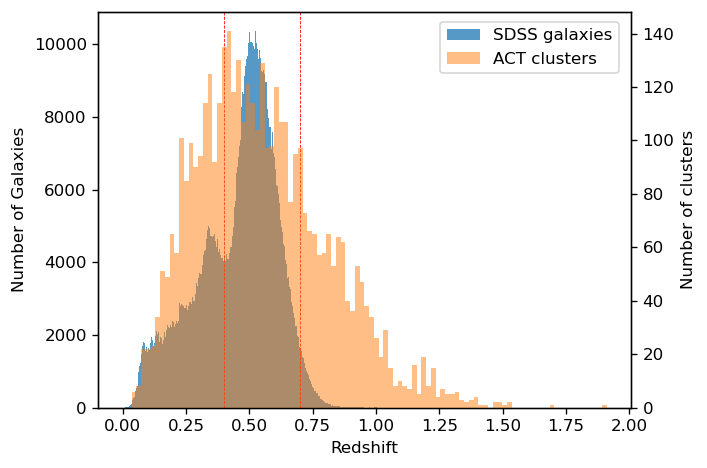

In [59]:
# plt.figure(dpi = dpi)

fig, ax1 = plt.subplots(dpi = dpi)

ax1.hist(df_sdss_gals['Z'], bins = 500, alpha = 0.75, label = 'SDSS galaxies');
ax1.set_xlabel('Redshift')
ax1.set_ylabel('Number of Galaxies')
# ax1.set_title('SDSS galaxies redshift distribution');

ax2 = ax1.twinx()

ax2.hist(df_act_clus['redshift'], bins = 100, alpha = 0.5, color = 'C1', 
         label = 'ACT clusters');
ax2.set_ylabel('Number of clusters')
# plt.title('Redshift distribution of ACT clusters and SDSS galaxies');

fig.legend(bbox_to_anchor=(0.88, 0.96))

ax1.axvline(x=0.4,  linestyle = 'dashed', color = 'r', 
          lw = 0.5)
ax1.axvline(x=0.7,  linestyle = 'dashed', color = 'r', 
          lw = 0.5)

plt.tight_layout()
plt.savefig('Plots/histogram/clus_gal_hist.pdf')

In [70]:
%matplotlib

dpi = 120

fig = plt.figure(dpi = dpi)
ax = fig.add_subplot(projection='3d')

no_gal_show = 50000
# no_gal_show = len(df_sdss_gals)/

df_sdss_gals_sample = df_sdss_gals.sample(n = no_gal_show, replace = False, 
                                               random_state = 0)  


ax.scatter(df_sdss_gals_sample['X_comov[Mpc/h]'], 
           df_sdss_gals_sample['Y_comov[Mpc/h]'], 
           df_sdss_gals_sample['Z_comov[Mpc/h]'],
           s = 0.2, alpha = 0.8, c = 'C0', label = 'SDSS galaxies',
            rasterized=True);

ax.scatter(df_act_clus['x_comov[Mpc/h]'], 
           df_act_clus['y_comov[Mpc/h]'], 
           df_act_clus['z_comov[Mpc/h]'],
           s = 0.2, alpha = 0.8, c = 'C1', label = 'ACT clusters');

plt.legend(markerscale = 15)

ax.set_xlabel('X (Mpc/h)', labelpad = 4)
ax.set_ylabel('Y (Mpc/h)', labelpad = 8)
ax.set_zlabel('Z (Mpc/h)', labelpad = 8)

low_lim, high_lim = -6000, 6000
ax.set_xlim(low_lim, high_lim)
ax.set_ylim(low_lim, high_lim)
ax.set_zlim(low_lim, high_lim)

ax.set_xticks(range(low_lim, high_lim + 1, 3000))
ax.set_yticks(range(low_lim, high_lim + 1, 3000))
ax.set_zticks(range(low_lim, high_lim + 1, 3000))

# plt.title('Distribution of ACT clusters and SDSS galaxies')

plt.tight_layout()
plt.savefig('Plots/3D_dist/clus_gal_3D_dist.pdf', dpi = 300)

Using matplotlib backend: Qt5Agg


In [9]:
%matplotlib

dpi = 120

fig = plt.figure(dpi = dpi)
ax = fig.add_subplot(projection='3d')

no_gal_show = 5000
no_gal_show = len(df_act_clus)

df_sdss_gals_sample = df_sdss_gals.sample(n = no_gal_show, replace = False, 
                                               random_state = 0)  


ax.scatter(df_sdss_gals_sample['X_comov[Mpc/h]'], 
           df_sdss_gals_sample['Y_comov[Mpc/h]'], 
           df_sdss_gals_sample['Z_comov[Mpc/h]'],
           s = 0.2, alpha = 0.8, c = 'C0', label = 'SDSS galaxies');

ax.scatter(df_act_clus['x_comov[Mpc/h]'], 
           df_act_clus['y_comov[Mpc/h]'], 
           df_act_clus['z_comov[Mpc/h]'],
           s = 0.2, alpha = 0.8, c = 'C1', label = 'ACT clusters');

plt.legend(markerscale = 15)

ax.set_xlabel('X (Mpc/h)', labelpad = 4)
ax.set_ylabel('Y (Mpc/h)', labelpad = 8)
ax.set_zlabel('Z (Mpc/h)', labelpad = 8)

low_lim, high_lim = -4500, 4500
ax.set_xlim(low_lim, high_lim)
ax.set_ylim(low_lim, high_lim)
ax.set_zlim(low_lim, high_lim)


# plt.title('Distribution of ACT clusters and SDSS galaxies')

plt.show()

Using matplotlib backend: Qt5Agg


/vol/arc10/data1/amirza/Misc/anaconda/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/vol/arc10/data1/amirza/Misc/anaconda/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


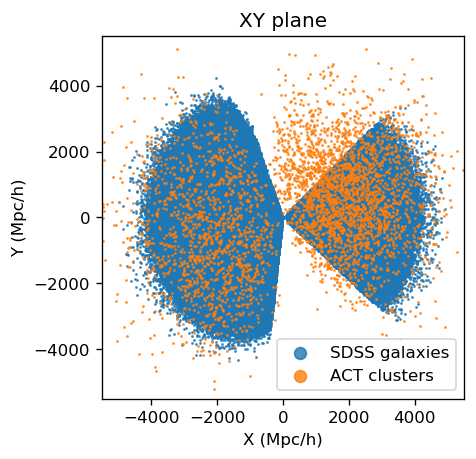

In [10]:
%matplotlib inline

plt.figure(dpi = dpi * 1)



plt.scatter(df_sdss_gals['X_comov[Mpc/h]'], 
            df_sdss_gals['Y_comov[Mpc/h]'],
            s = 0.5, alpha = 0.8, label = 'SDSS galaxies')
plt.scatter(df_act_clus['x_comov[Mpc/h]'], 
            df_act_clus['y_comov[Mpc/h]'],
            s = 0.5, alpha = 0.8, label = 'ACT clusters')

plt.legend(markerscale = 10)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -5500, 5500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('X (Mpc/h)')
plt.ylabel('Y (Mpc/h)')
plt.title('XY plane');



# plt.tight_layout();

**27 Aug 2021**  
A: Out of 4000, 1000 clusters should be enough for stacking. There are more clusters in the South (2307) than they are in the North (1888). This is in contrast with the galaxies with are more in the North (0.9 Million) vs in the South (0.4 Million).
**Task** Get the diagram checked with the ACT tutor in the workshop.

<ipython-input-11-a227fce1f01c>:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout();


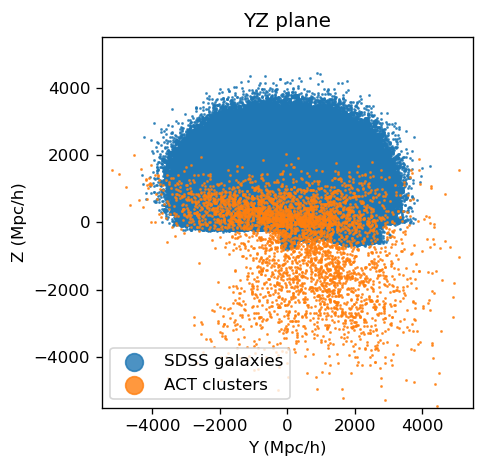

In [11]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))


plt.scatter(df_sdss_gals['Y_comov[Mpc/h]'], 
            df_sdss_gals['Z_comov[Mpc/h]'],
            s = 0.5, alpha = 0.8, label = 'SDSS galaxies')
plt.scatter(df_act_clus['y_comov[Mpc/h]'], 
            df_act_clus['z_comov[Mpc/h]'],
            s = 0.5, alpha = 0.8, label = 'ACT clusters')

plt.legend(markerscale = 15)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -5500, 5500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('Y (Mpc/h)')
plt.ylabel('Z (Mpc/h)')
plt.title('YZ plane');


# plt.tight_layout();

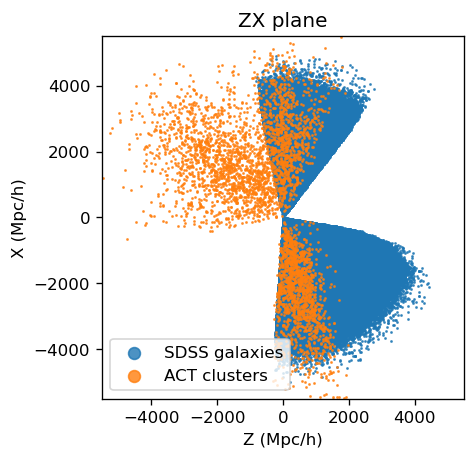

In [12]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))


plt.scatter(df_sdss_gals['Z_comov[Mpc/h]'], 
            df_sdss_gals['X_comov[Mpc/h]'],
            s = 0.5, alpha = 0.8, label = 'SDSS galaxies')
plt.scatter(df_act_clus['z_comov[Mpc/h]'], 
            df_act_clus['x_comov[Mpc/h]'],
            s = 0.5, alpha = 0.8, label = 'ACT clusters')

plt.legend(markerscale = 10)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -5500, 5500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('Z (Mpc/h)')
plt.ylabel('X (Mpc/h)')
plt.title('ZX plane');


# plt.tight_layout();

In [13]:
min_common_dec = round(max(df_sdss_gals['DEC'].min(), df_act_clus['decDeg'].min()), 3)
print('Minimum common declination: ' + str(min_common_dec))

max_common_dec = round(min(df_sdss_gals['DEC'].max(), df_act_clus['decDeg'].max()), 3)
print('Minimum common declination: ' + str(max_common_dec))

print('\n')

max_common_redshift = round(min(df_sdss_gals['Z'].max(), df_act_clus['redshift'].max()), 3)
print('Maximum common redshift: ' + str(max_common_redshift))

Minimum common declination: -10.997
Minimum common declination: 20.486


Maximum common redshift: 1.137


In [14]:
%%time

radius = 250

df_act_clus_copy = df_act_clus.copy()

gals_num = []
inside_clus = []

for index, clus in df_act_clus_copy.iterrows():
    
    df_gals_bar_x = df_sdss_gals[(df_sdss_gals['Y_comov[Mpc/h]'] < (clus['y_comov[Mpc/h]'] + radius)) &
                                 (df_sdss_gals['Y_comov[Mpc/h]'] > (clus['y_comov[Mpc/h]'] - radius)) &
                                 (df_sdss_gals['Z_comov[Mpc/h]'] < (clus['z_comov[Mpc/h]'] + radius)) &
                                 (df_sdss_gals['Z_comov[Mpc/h]'] > (clus['z_comov[Mpc/h]'] - radius))].copy()
    
    edge_gals = [df_gals_bar_x[(df_gals_bar_x['X_comov[Mpc/h]'] > (clus['x_comov[Mpc/h]'] + radius))].shape[0],
                 df_gals_bar_x[(df_gals_bar_x['X_comov[Mpc/h]'] < (clus['x_comov[Mpc/h]'] - radius))].shape[0]]
    
    
    
    df_gals_bar_y = df_sdss_gals[(df_sdss_gals['X_comov[Mpc/h]'] < (clus['x_comov[Mpc/h]'] + radius)) &
                                 (df_sdss_gals['X_comov[Mpc/h]'] > (clus['x_comov[Mpc/h]'] - radius)) &
                                 (df_sdss_gals['Z_comov[Mpc/h]'] < (clus['z_comov[Mpc/h]'] + radius)) &
                                 (df_sdss_gals['Z_comov[Mpc/h]'] > (clus['z_comov[Mpc/h]'] - radius))].copy()
    
    edge_gals.append(df_gals_bar_y[(df_gals_bar_y['Y_comov[Mpc/h]'] > (clus['y_comov[Mpc/h]'] + radius))].shape[0])
    edge_gals.append(df_gals_bar_y[(df_gals_bar_y['Y_comov[Mpc/h]'] < (clus['y_comov[Mpc/h]'] - radius))].shape[0])
    
    
    
    df_gals_bar_z = df_sdss_gals[(df_sdss_gals['X_comov[Mpc/h]'] < (clus['x_comov[Mpc/h]'] + radius)) &
                                 (df_sdss_gals['X_comov[Mpc/h]'] > (clus['x_comov[Mpc/h]'] - radius)) &
                                 (df_sdss_gals['Y_comov[Mpc/h]'] < (clus['y_comov[Mpc/h]'] + radius)) &
                                 (df_sdss_gals['Y_comov[Mpc/h]'] > (clus['y_comov[Mpc/h]'] - radius))].copy()
    
    edge_gals.append(df_gals_bar_z[(df_gals_bar_z['Z_comov[Mpc/h]'] > (clus['z_comov[Mpc/h]'] + radius))].shape[0])
    edge_gals.append(df_gals_bar_z[(df_gals_bar_z['Z_comov[Mpc/h]'] < (clus['z_comov[Mpc/h]'] - radius))].shape[0])
    
    
    gals_num.append(edge_gals)
    
    if 0 in edge_gals:
        inside_clus.append(False)
    else:
        inside_clus.append(True)
    

    if index > 5:
        break
    


print(inside_clus)
print(gals_num)




[False, False, False, True, False, True, False]
[[0, 0, 0, 0, 10431, 0], [0, 0, 0, 0, 9930, 0], [450, 0, 0, 0, 10467, 0], [5764, 36714, 15413, 10670, 11580, 1016], [13049, 18142, 6337, 3380, 6694, 0], [6339, 53731, 15274, 13416, 9820, 1546], [0, 0, 0, 0, 10410, 0]]
CPU times: user 1.12 s, sys: 20.6 ms, total: 1.14 s
Wall time: 252 ms


In [15]:
def egde_gals_counter(clus, radius):
    
    df_gals_bar_x = df_sdss_gals[(df_sdss_gals['Y_comov[Mpc/h]'] < (clus['y_comov[Mpc/h]'] + radius)) &
                                 (df_sdss_gals['Y_comov[Mpc/h]'] > (clus['y_comov[Mpc/h]'] - radius)) &
                                 (df_sdss_gals['Z_comov[Mpc/h]'] < (clus['z_comov[Mpc/h]'] + radius)) &
                                 (df_sdss_gals['Z_comov[Mpc/h]'] > (clus['z_comov[Mpc/h]'] - radius))].copy()
    
    edge_gals = [df_gals_bar_x[(df_gals_bar_x['X_comov[Mpc/h]'] > (clus['x_comov[Mpc/h]'] + radius))].shape[0],
                 df_gals_bar_x[(df_gals_bar_x['X_comov[Mpc/h]'] < (clus['x_comov[Mpc/h]'] - radius))].shape[0]]
    
    
    
    df_gals_bar_y = df_sdss_gals[(df_sdss_gals['X_comov[Mpc/h]'] < (clus['x_comov[Mpc/h]'] + radius)) &
                                 (df_sdss_gals['X_comov[Mpc/h]'] > (clus['x_comov[Mpc/h]'] - radius)) &
                                 (df_sdss_gals['Z_comov[Mpc/h]'] < (clus['z_comov[Mpc/h]'] + radius)) &
                                 (df_sdss_gals['Z_comov[Mpc/h]'] > (clus['z_comov[Mpc/h]'] - radius))].copy()
    
    edge_gals.append(df_gals_bar_y[(df_gals_bar_y['Y_comov[Mpc/h]'] > (clus['y_comov[Mpc/h]'] + radius))].shape[0])
    edge_gals.append(df_gals_bar_y[(df_gals_bar_y['Y_comov[Mpc/h]'] < (clus['y_comov[Mpc/h]'] - radius))].shape[0])
    
    
    
    df_gals_bar_z = df_sdss_gals[(df_sdss_gals['X_comov[Mpc/h]'] < (clus['x_comov[Mpc/h]'] + radius)) &
                                 (df_sdss_gals['X_comov[Mpc/h]'] > (clus['x_comov[Mpc/h]'] - radius)) &
                                 (df_sdss_gals['Y_comov[Mpc/h]'] < (clus['y_comov[Mpc/h]'] + radius)) &
                                 (df_sdss_gals['Y_comov[Mpc/h]'] > (clus['y_comov[Mpc/h]'] - radius))].copy()
    
    edge_gals.append(df_gals_bar_z[(df_gals_bar_z['Z_comov[Mpc/h]'] > (clus['z_comov[Mpc/h]'] + radius))].shape[0])
    edge_gals.append(df_gals_bar_z[(df_gals_bar_z['Z_comov[Mpc/h]'] < (clus['z_comov[Mpc/h]'] - radius))].shape[0])
    
    
    if 0 in edge_gals:
        inside_clus = False
    else:
        inside_clus = True
        
    return (edge_gals, inside_clus)

In [7]:
df_act_clus = pd.read_csv('Data/ACT_DR5_Clusters_Comov.csv', index_col = 0)
df_act_clus.describe()

/vol/arc10/data1/amirza/Misc/anaconda/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,RA,DEC,Z,r_comov[Mpc/h],X_comov[Mpc/h],Y_comov[Mpc/h],Z_comov[Mpc/h]
count,1325735.000,1325735.000,1325735.000,1325735.000,1325735.000,1325735.000,1325735.000
mean,178.676,23.417,0.452,2596.975,-594.580,-74.705,976.706
std,92.194,18.180,0.157,823.919,1964.434,1263.945,808.397
min,0.000,-10.997,0.000,0.032,-4993.670,-4315.740,-805.466
25%,135.845,8.361,0.347,2083.786,-2049.560,-983.879,307.587
50%,181.891,21.477,0.486,2808.285,-1230.263,-33.060,847.189
75%,227.366,35.940,0.563,3185.174,1177.849,835.904,1535.834
max,359.999,68.738,1.137,5500.920,4902.803,4241.546,4441.835


In [26]:
%%time

clus_inside_results = pd.DataFrame(columns=['Radius', 'Clusters'])
df_act_clus_z_gt_4 = pd.read_csv('Data/ACT_DR5_Clusters_Comov_z_gt_4_lt_7.csv', index_col = 0)
df_act_clus_copy = df_act_clus_z_gt_4.copy()

radius = 200

for radius in range(100, 400, 50):
# for radius in [250]:
    
    t = time.time()
    
    print(radius)

    clus_param = [(clus, radius) for i, clus in df_act_clus_copy.iterrows()]


    pool = multi.Pool(processes = cores)
    edge_info = pool.starmap(egde_gals_counter, clus_param)


    edge_gals_list = [i[0] for i in edge_info]
    inside_clus_list = [i[1] for i in edge_info]


    df_act_clus_z_gt_4['inside_clus'] = inside_clus_list
    df_act_clus_z_gt_4['gals_beyond_250Mpc'] = edge_gals_list
    
    df_act_clus_available = df_act_clus_z_gt_4[inside_clus_list].reset_index(drop = True)
    df_act_clus_available.to_csv(f'Data/z_gt_4/ACT_clus_available_{radius}.csv')
    
    clus_inside_results = clus_inside_results.append({'Radius': radius,
                            'Clusters': sum(inside_clus_list)},
                            ignore_index=True)
    
    
    
    print('Time taken:', (time.time() - t)/60)
    print('\n')
    

clus_inside_results.head()

100
Time taken: 0.17332815726598103


150
Time taken: 0.1945428172747294


200
Time taken: 0.19174890915552775


250
Time taken: 0.1783125877380371


300
Time taken: 0.20150698026021321


350
Time taken: 0.21923489173253377


CPU times: user 5.38 s, sys: 6.85 s, total: 12.2 s
Wall time: 1min 9s


,Radius,Clusters
0,100,854
1,150,840
2,200,822
3,250,802
4,300,782


In [17]:
clus_inside_results.to_csv('available_clusters_for_radius.csv', )

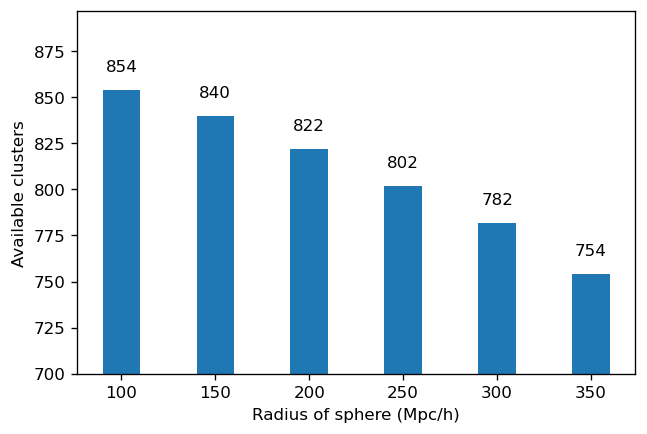

In [30]:
%matplotlib inline

plt.figure(dpi = dpi)

bar_out = plt.bar(clus_inside_results['Radius'], clus_inside_results['Clusters'], width = 20)
plt.xlabel('Radius of sphere (Mpc/h)')
plt.ylabel('Available clusters')
plt.ylim(700,)

for i, row in clus_inside_results.iterrows():
    plt.text(row['Radius'], row['Clusters'] + 10, row['Clusters'],
            horizontalalignment = 'center')
    


**1 Sep 2021**  
A: 
- If we reduce box size, our reconstruction will not be faithful because of the dipole effect that we found with Magneticum. We have to have radius so that the amplitude of velocity field reaches an asymptote. Still not pefect but it has to be sufficiently large.  
- Working with 800 or 850 clusters doesn't make difference. It's just 7% difference. With stacking, CMB residual noise and thermal noise will go down. We cannot reduce the box size because then there is residual dipole velocity problem.
- As ACT paper, velocity reconstruction can be done for galaxy halos since mass of the point doesn't matter. They may have early convergence because their infall (non-linear) velocity is much less.
- With 3 lac galaxies (actually 8 lac), ACT people must be having low resulting noise. kSZ is proportional to momentum (optical depth or mass times velocity). Optical depth goes with mass. If mean mass of gal halos is 10 times lower, kSZ signal is also 10 times lower. To get equivalent signal to noise for gal halos with 10 times low signal, one need to stack 100 times more gal halos. For 800 clusters whose mean mass is 10 times more, one needs 80k (or 100k) galaxies to get equivalent signal.
- Planck, Tanimura and others used clusters.
- Let's use our 800 clusters and see where we go.

In [28]:
df_act_clus_available.describe()

,RADeg,decDeg,redshift,M500,r_comov[Mpc/h],x_comov[Mpc/h],y_comov[Mpc/h],z_comov[Mpc/h]
count,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000
mean,174.581360,10.148306,0.543349,2.399048,3078.537656,-711.041731,-282.821731,537.062574
std,97.020982,6.143489,0.085480,0.831821,413.250878,2512.581725,1536.907283,332.325539
min,0.113536,-5.423591,0.400034,1.327872,2365.135785,-3667.341017,-3444.250363,-327.064291
25%,130.658641,5.690519,0.465253,1.823621,2702.393920,-2712.767276,-1583.873086,305.001586
50%,189.914807,10.836667,0.544240,2.194317,3093.536207,-2003.176634,-293.952475,571.685122
75%,228.365322,15.094073,0.617787,2.781727,3441.274110,2442.095812,940.233790,788.190296
max,359.886623,20.232137,0.699912,8.132106,3811.609493,3759.638002,3200.001426,1236.427091
